# Project Name: Predicting HDB Resale Prices (Part 1)

### Content:
### 1. Overview
### 2. Data Cleaning
### 3. Exploratory Data Analysis (EDA) on house_df1

## 1. Overview

### Introduction
Determining the true sale price of a HDB resale flat is often complicated due to the confluence of external and internal factors.

### Problem Statement
In Singapore, HDB flat owners typically buy and sell property via agents.
Buyers and sellers are at the mercy of the final price quoted, before including the processing and commission fees. 
Absence of pricing model can lead to uncertainty and unfair pricing.


### Goal

Create a predictive model that estimates the resale price of HDB flats based on historical prices and property attributes.
This empowers users with a fair valuation alternative to prices quoted by property agents.

### Who we are:
A group of data scientist looking to launch an online platform that enables end-users to estimate HDB flats resale price online. 

### Target Audience: 
Potential HDB flat buyers or sellers.

### Outside Research
Some researching were done to include more features that might impact the HDB resale price.
Such as 
* The influence of staying nearer to schools: PropertyGuru (https://www.propertyguru.com.sg/property-guides/primary-school-singapore-moving-house-48819)
* Top 10 Most Popular HDB Neighbourhoods : Yahoo SG (https://sg.finance.yahoo.com/news/top-10-most-popular-hdb-020000687.html)
* HDB units that are located at Central Regions: HDB (https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home)
* HDB Price Index to factor the overall price movements: Singstat(https://tablebuilder.singstat.gov.sg/table/TS/M212161)


### Data Sources

* DSI-SG Datsaset: Kaggle (https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data)

(The Train CSV file obtained contains transactions data from March 2012 to April 2021.)

* HDB Price Index: Singstat(https://tablebuilder.singstat.gov.sg/table/TS/M212161)
* Primary School Ranking : Schoolbell (https://schoolbell.sg/primary-school-ranking/)
* Secondary School Ranking : Schoolbell (https://schoolbell.sg/secondary-school-ranking/)
* HDB Town: HDB (https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home)
* Top 10 Most Popular HDB: Yahoo SG (https://sg.finance.yahoo.com/news/top-10-most-popular-hdb-020000687.html)

</br> ***Due to the file size limit of Github, the dataset shall be retrieve via this google drive link:***
(https://drive.google.com/drive/folders/1oSzWHOKNKwRPGP5tIw-REQKtUP8R2zyx?usp=drive_link)

### Data Files for Data Cleaning and EDA
* Train data: train.csv
* Test data: test.csv

## 2. Data Cleaning

### Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Train and Test Data CSV

* house_df : Train data
* house_df_test : Test data

In [2]:
#Load dataset
house_df = pd.read_csv('datasets/train.csv')
house_df_test = pd.read_csv('datasets/test.csv')

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_6804\1130398095.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  house_df = pd.read_csv('datasets/train.csv')
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_6804\1130398095.py:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  house_df_test = pd.read_csv('datasets/test.csv')


### Check on Train Data CSV

In [3]:
house_df.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  hdb_age  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760       15   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320       34   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016       24   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692       29   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412       34   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   
3             11            1990           Y          Y             N   
4              4            1987           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   
3                   N                 N                    75           0   
4                   N                 N                    48           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  postal  Latitude   Longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   
2                  0  651289  1.343867  103.760535   Bukit Batok   
3                  0  570232  1.358245  103.845504        Bishan   
4                  0  760876  1.414745  103.835532        Yishun   

   Mall_Neares

### Check on Test Data CSV

In [4]:
house_df_test.head()

id Tranc_YearMonth         town flat_type block          street_name  \
0  114982         2012-11       YISHUN    4 ROOM   173         YISHUN AVE 7   
1   95653         2019-08  JURONG WEST    5 ROOM  986C    JURONG WEST ST 93   
2   40303         2013-10   ANG MO KIO    3 ROOM   534    ANG MO KIO AVE 10   
3  109506         2017-10    WOODLANDS    4 ROOM    29         MARSILING DR   
4  100149         2016-08  BUKIT BATOK    4 ROOM   170  BT BATOK WEST AVE 8   

  storey_range  floor_area_sqm         flat_model  lease_commence_date  \
0     07 TO 09            84.0         Simplified                 1987   
1     04 TO 06           112.0  Premium Apartment                 2008   
2     07 TO 09            68.0     New Generation                 1980   
3     01 TO 03            97.0     New Generation                 1979   
4     16 TO 18           103.0            Model A                 1985   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2012           11           8      7      9    8   
1        2019            8           5      4      6    5   
2        2013           10           8      7      9    8   
3        2017           10           2      1      3    2   
4        2016            8          17     16     18   17   

             full_flat_type                   address  floor_area_sqft  \
0         4 ROOM Simplified         173, YISHUN AVE 7          904.176   
1  5 ROOM Premium Apartment   986C, JURONG WEST ST 93         1205.568   
2     3 ROOM New Generation    534, ANG MO KIO AVE 10          731.952   
3     4 ROOM New Generation          29, MARSILING DR         1044.108   
4            4 ROOM Model A  170, BT BATOK WEST AVE 8         1108.692   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       34             12            1986           Y          Y   
1       13             14            2002           Y          N   
2       41             12            1979           Y          N   
3       42             14            1976           Y          N   
4       36             25            1985           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   132   
1             N                   N                 N                    53   
2             N                   N                 N                   218   
3             N                   N                 N                   104   
4             N                   N                 N                   144   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          92          40          0   
1           0           0           0          28          25          0   
2           0           0         191          22           1          1   
3           0           0           0         104           0          0   
4           0           0           0          48          96          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  760173  1.437066  103.831121   
1             0                  0  643986  1.336957  103.695668   
2             3                  0  560534  1.374058  103.854168   
3             0                  0  731029  1.442748  103.772922   
4             0                  0  650170  1.346556  103.740101   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0        Yishun      

### Check Rows and Columns

In [5]:
#Check rows and columns
print(f"Shape for train dataset; {house_df.shape}")
print(f"Shape for test dataset; {house_df_test.shape}")

Shape for train dataset; (150634, 77)
Shape for test dataset; (16737, 76)


### Check Data Type on Train CSV

In [6]:
house_df.dtypes

id                             int64
Tranc_YearMonth               object
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
mid_storey                     int64
lower                          int64
upper                          int64
mid                            int64
full_flat_type                object
address                       object
floor_area_sqft              float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
residential                   object
commercial                    object
market_hawker                 object
multistorey_carpark           object
p

### Check Data Type on Test CSV

In [7]:
house_df_test.dtypes

id                             int64
Tranc_YearMonth               object
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
Tranc_Year                     int64
Tranc_Month                    int64
mid_storey                     int64
lower                          int64
upper                          int64
mid                            int64
full_flat_type                object
address                       object
floor_area_sqft              float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
residential                   object
commercial                    object
market_hawker                 object
multistorey_carpark           object
precinct_pavilion             object
t

### Check Train CSV Data Basic Stats

In [8]:
#Check basic stats
house_df.describe(include='all')

id Tranc_YearMonth         town flat_type   block  \
count   150634.000000          150634       150634    150634  150634   
unique            NaN             110           26         7    2514   
top               NaN         2018-07  JURONG WEST    4 ROOM       2   
freq              NaN            2088        11451     61136     579   
mean     93047.887496             NaN          NaN       NaN     NaN   
std      53679.906247             NaN          NaN       NaN     NaN   
min          1.000000             NaN          NaN       NaN     NaN   
25%      46469.250000             NaN          NaN       NaN     NaN   
50%      93077.500000             NaN          NaN       NaN     NaN   
75%     139574.750000             NaN          NaN       NaN     NaN   
max     185966.000000             NaN          NaN       NaN     NaN   

           street_name storey_range  floor_area_sqm flat_model  \
count           150634       150634    150634.00000     150634   
unique             553           25             NaN         20   
top     YISHUN RING RD     04 TO 06             NaN    Model A   
freq              2451        34699             NaN      46261   
mean               NaN          NaN        97.19763        NaN   
std                NaN          NaN        24.40304        NaN   
min                NaN          NaN        31.00000        NaN   
25%                NaN          NaN        75.00000        NaN   
50%                NaN          NaN        95.00000        NaN   
75%                NaN          NaN       112.00000        NaN   
max                NaN          NaN       280.00000        NaN   

        lease_commence_date  resale_price     Tranc_Year    Tranc_Month  \
count         150634.000000  1.506340e+05  150634.000000  150634.000000   
unique                  NaN           NaN            NaN            NaN   
top                     NaN           NaN            NaN            NaN   
freq                    NaN           NaN            NaN            NaN   
mean            1992.448464  4.491615e+05    2016.489551       6.580500   
std               12.138829  1.433076e+05       2.752396       3.345468   
min             1966.000000  1.500000e+05    2012.000000       1.000000   
25%             1984.000000  3.470000e+05    2014.000000       4.000000   
50%             1992.000000  4.200000e+05    2017.000000       7.000000   
75%             2001.000000  5.200000e+05    2019.000000       9.000000   
max             2019.000000  1.258000e+06    2021.000000      12.000000   

           mid_storey          lower          upper            mid  \
count   150634.000000  150634.000000  150634.000000  150634.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         8.284823       7.248370       9.321275       8.284823   
std          5.508074       5.515155       5.507364       5.508074   
min          2.000000       1.000000       3.000000       2.000000   
25%          5.000000       4.000000       6.000000       5.000000   
50%          8.000000       7.000000       9.000000       8.000000   
75%         11.000000      10.000000      12.000000      11.000000   
max         50.000000      49.000000      51.000000      50.000000   

        full_flat_type              address  floor_area_sqft        hdb_age  \
count           150634               150634    150634.000000  150634.000000   
unique              43                 9157              NaN            NaN   
top     4 ROOM Model A  91, TANGLIN HALT RD              NaN            NaN   
freq             35127                  106              NaN            NaN   
mean               NaN                  NaN      1046.235290      28.551536   
std                NaN                  NaN       262.674321      12.138829   
min                NaN                  NaN       333.684000      

### Check Test CSV Data Basic Stats

In [9]:
#Check basic stats
house_df_test.describe(include='all')

id Tranc_YearMonth         town flat_type  block  \
count    16737.000000           16737        16737     16737  16737   
unique            NaN             110           26         7   2248   
top               NaN         2020-12  JURONG WEST    4 ROOM      2   
freq              NaN             240         1246      6867     68   
mean     92253.767342             NaN          NaN       NaN    NaN   
std      53302.038393             NaN          NaN       NaN    NaN   
min          7.000000             NaN          NaN       NaN    NaN   
25%      46550.000000             NaN          NaN       NaN    NaN   
50%      91830.000000             NaN          NaN       NaN    NaN   
75%     137789.000000             NaN          NaN       NaN    NaN   
max     185967.000000             NaN          NaN       NaN    NaN   

           street_name storey_range  floor_area_sqm flat_model  \
count            16737        16737    16737.000000      16737   
unique             545           23             NaN         19   
top     YISHUN RING RD     04 TO 06             NaN    Model A   
freq               255         3813             NaN       5239   
mean               NaN          NaN       96.923821        NaN   
std                NaN          NaN       24.447727        NaN   
min                NaN          NaN       31.000000        NaN   
25%                NaN          NaN       74.000000        NaN   
50%                NaN          NaN       95.000000        NaN   
75%                NaN          NaN      112.000000        NaN   
max                NaN          NaN      266.000000        NaN   

        lease_commence_date    Tranc_Year   Tranc_Month    mid_storey  \
count          16737.000000  16737.000000  16737.000000  16737.000000   
unique                  NaN           NaN           NaN           NaN   
top                     NaN           NaN           NaN           NaN   
freq                    NaN           NaN           NaN           NaN   
mean            1992.341220   2016.462568      6.571309      8.276394   
std               12.170893      2.745399      3.338882      5.503939   
min             1966.000000   2012.000000      1.000000      2.000000   
25%             1984.000000   2014.000000      4.000000      5.000000   
50%             1991.000000   2017.000000      7.000000      8.000000   
75%             2001.000000   2019.000000      9.000000     11.000000   
max             2019.000000   2021.000000     12.000000     50.000000   

               lower         upper           mid  full_flat_type  \
count   16737.000000  16737.000000  16737.000000           16737   
unique           NaN           NaN           NaN              40   
top              NaN           NaN           NaN  4 ROOM Model A   
freq             NaN           NaN           NaN            3960   
mean        7.237737      9.315050      8.276394             NaN   
std         5.512181      5.502442      5.503939             NaN   
min         1.000000      3.000000      2.000000             NaN   
25%         4.000000      6.000000      5.000000             NaN   
50%         7.000000      9.000000      8.000000             NaN   
75%        10.000000     12.000000     11.000000             NaN   
max        49.000000     51.000000     50.000000             NaN   

                  address  floor_area_sqft       hdb_age  max_floor_lvl  \
count               16737     16737.000000  16737.000000   16737.000000   
unique               7044              NaN           NaN            NaN   
top     187, BOON LAY AVE              NaN           NaN            NaN   
freq                   17              NaN           NaN            NaN   
mean                  NaN      1043.288014     28.658780      15.130011   
std                   NaN       263.155328     12.170893       6.126188   
min                   NaN       333.684000      2.000000       2.000000   
25%                   NaN       796.536000     20.000000      12.000000   
50% 

### Check Duplicates

In [10]:
#Check duplicates
house_df_duplicates = house_df.duplicated().sum()
house_df_test_duplicates = house_df_test.duplicated().sum()

print(f'Total number of duplicated rows for Train dataset : {house_df_duplicates}')
print(f'Total number of duplicated rows for Test dataset : {house_df_duplicates}')

Total number of duplicated rows for Train dataset : 0
Total number of duplicated rows for Test dataset : 0


### Identify Null Values in Train CSV

In [11]:
def print_null_values(dataset):
    # Calculate null value counts
    null_counts = dataset.isnull().sum()
    
    # Filter columns with null values
    columns_with_null_values = null_counts[null_counts > 0]
    
    # Print columns with null values
    print("Columns with null values:")
    print(columns_with_null_values)

In [12]:
print_null_values(house_df)

Columns with null values:
Mall_Nearest_Distance      829
Mall_Within_500m         92789
Mall_Within_1km          25426
Mall_Within_2km           1940
Hawker_Within_500m       97390
Hawker_Within_1km        60868
Hawker_Within_2km        29202
dtype: int64


### Identify Null Values in Test CSV

In [13]:
print_null_values(house_df_test)

Columns with null values:
Mall_Nearest_Distance       84
Mall_Within_500m         10292
Mall_Within_1km           2786
Mall_Within_2km            213
Hawker_Within_500m       10755
Hawker_Within_1km         6729
Hawker_Within_2km         3254
dtype: int64


### Handling Null Values: Imputation for Mall_Nearest_Distance
* Of all the null value shown in the previous line, Mall_Nearest_Distance will be used in this analysis.
* Hence the imputation for this feature will be referenced by using town reason being it is the broader feature as compared to using a more defined feature such as address which may contain null value at the Mall_Nearest_Distance column the corresponds to the address data. Causing the imputation to be ineffective.

In [14]:
#Mall_Nearest_Distance will be used in this analysis
#Hence the imputation for this feature will be referenced by using town 

# Calculate the average Mall_Nearest_Distance for each towm
average_distances = house_df.groupby('town')['Mall_Nearest_Distance'].transform('mean')

In [15]:
# Calculate the average Mall_Nearest_Distance for each towm
average_distances_gb = house_df.groupby('town')['Mall_Nearest_Distance'].mean()
average_distances_gb

town
ANG MO KIO          777.684351
BEDOK              1028.419542
BISHAN              757.967159
BUKIT BATOK         915.499125
BUKIT MERAH         747.318531
BUKIT PANJANG       471.187584
BUKIT TIMAH         899.837605
CENTRAL AREA        300.170870
CHOA CHU KANG       377.254736
CLEMENTI            494.094722
GEYLANG             924.211380
HOUGANG             518.411792
JURONG EAST        1118.013095
JURONG WEST         618.033820
KALLANG/WHAMPOA     901.945072
MARINE PARADE       836.077445
PASIR RIS           612.175678
PUNGGOL             470.796975
QUEENSTOWN          670.915617
SEMBAWANG           561.843144
SENGKANG            482.757776
SERANGOON           641.347545
TAMPINES            736.040343
TOA PAYOH           778.499572
WOODLANDS           553.361256
YISHUN              619.459242
Name: Mall_Nearest_Distance, dtype: float64

### Impute Data for Train CSV

In [16]:
# Impute missing values with the average distances of the different town
house_df['Mall_Nearest_Distance'] = house_df['Mall_Nearest_Distance'].fillna(average_distances)

In [17]:
print_null_values(house_df)

# Number of Null values for Mall_Nearest_Distance has reduced to 0

Columns with null values:
Mall_Within_500m      92789
Mall_Within_1km       25426
Mall_Within_2km        1940
Hawker_Within_500m    97390
Hawker_Within_1km     60868
Hawker_Within_2km     29202
dtype: int64


### Impute Data for Test CSV

Imputation for this feature will be referenced by using town from Train CSV dataset

In [18]:
average_distances_df = average_distances_gb.reset_index().rename(columns={'Mall_Nearest_Distance': 'Average_Mall_Nearest_Distance'})
average_distances_df

town  Average_Mall_Nearest_Distance
0        ANG MO KIO                     777.684351
1             BEDOK                    1028.419542
2            BISHAN                     757.967159
3       BUKIT BATOK                     915.499125
4       BUKIT MERAH                     747.318531
5     BUKIT PANJANG                     471.187584
6       BUKIT TIMAH                     899.837605
7      CENTRAL AREA                     300.170870
8     CHOA CHU KANG                     377.254736
9          CLEMENTI                     494.094722
10          GEYLANG                     924.211380
11          HOUGANG                     518.411792
12      JURONG EAST                    1118.013095
13      JURONG WEST                     618.033820
14  KALLANG/WHAMPOA                     901.945072
15    MARINE PARADE                     836.077445
16        PASIR RIS                     612.175678
17          PUNGGOL                     470.796975
18       QUEENSTOWN                     670.915617
19        SEMBAWANG                     561.843144
20         SENGKANG                     482.757776
21        SERANGOON                     641.347545
22         TAMPINES                     736.040343
23        TOA PAYOH                     778.499572
24        WOODLANDS                     553.361256
25           YISHUN                     619.459242

In [19]:
# Create average_distances_df
average_distances_df = average_distances_gb.reset_index().rename(columns={'Mall_Nearest_Distance': 'Average_Mall_Nearest_Distance'})

# Map the average distances to the corresponding towns in house_df_test
house_df_test['Mall_Nearest_Distance'] = house_df_test['town'].map(average_distances_df.set_index('town')['Average_Mall_Nearest_Distance'])

In [20]:
print_null_values(house_df_test)

# Number of Null values for Mall_Nearest_Distance has reduced to 0

Columns with null values:
Mall_Within_500m      10292
Mall_Within_1km        2786
Mall_Within_2km         213
Hawker_Within_500m    10755
Hawker_Within_1km      6729
Hawker_Within_2km      3254
dtype: int64


### Create New Dataframes
* house_df1 : Train data

* house_df1_test : Test data

### house_df1 : Train CSV

In [21]:
#Create new dataframe house_df1

house_df1 = house_df

In [22]:
house_df1.shape

(150634, 77)

In [23]:
house_df1.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  hdb_age  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760       15   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320       34   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016       24   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692       29   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412       34   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   
3             11            1990           Y          Y             N   
4              4            1987           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   
3                   N                 N                    75           0   
4                   N                 N                    48           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  postal  Latitude   Longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   
2                  0  651289  1.343867  103.760535   Bukit Batok   
3                  0  570232  1.358245  103.845504        Bishan   
4                  0  760876  1.414745  103.835532        Yishun   

   Mall_Neares

### house_df1_test : Test CSV

In [24]:
#Create new dataframe house_df1_test

house_df1_test = house_df_test

In [25]:
house_df1_test.shape

(16737, 76)

In [26]:
house_df1_test.head()

id Tranc_YearMonth         town flat_type block          street_name  \
0  114982         2012-11       YISHUN    4 ROOM   173         YISHUN AVE 7   
1   95653         2019-08  JURONG WEST    5 ROOM  986C    JURONG WEST ST 93   
2   40303         2013-10   ANG MO KIO    3 ROOM   534    ANG MO KIO AVE 10   
3  109506         2017-10    WOODLANDS    4 ROOM    29         MARSILING DR   
4  100149         2016-08  BUKIT BATOK    4 ROOM   170  BT BATOK WEST AVE 8   

  storey_range  floor_area_sqm         flat_model  lease_commence_date  \
0     07 TO 09            84.0         Simplified                 1987   
1     04 TO 06           112.0  Premium Apartment                 2008   
2     07 TO 09            68.0     New Generation                 1980   
3     01 TO 03            97.0     New Generation                 1979   
4     16 TO 18           103.0            Model A                 1985   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2012           11           8      7      9    8   
1        2019            8           5      4      6    5   
2        2013           10           8      7      9    8   
3        2017           10           2      1      3    2   
4        2016            8          17     16     18   17   

             full_flat_type                   address  floor_area_sqft  \
0         4 ROOM Simplified         173, YISHUN AVE 7          904.176   
1  5 ROOM Premium Apartment   986C, JURONG WEST ST 93         1205.568   
2     3 ROOM New Generation    534, ANG MO KIO AVE 10          731.952   
3     4 ROOM New Generation          29, MARSILING DR         1044.108   
4            4 ROOM Model A  170, BT BATOK WEST AVE 8         1108.692   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       34             12            1986           Y          Y   
1       13             14            2002           Y          N   
2       41             12            1979           Y          N   
3       42             14            1976           Y          N   
4       36             25            1985           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   132   
1             N                   N                 N                    53   
2             N                   N                 N                   218   
3             N                   N                 N                   104   
4             N                   N                 N                   144   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          92          40          0   
1           0           0           0          28          25          0   
2           0           0         191          22           1          1   
3           0           0           0         104           0          0   
4           0           0           0          48          96          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  760173  1.437066  103.831121   
1             0                  0  643986  1.336957  103.695668   
2             3                  0  560534  1.374058  103.854168   
3             0                  0  731029  1.442748  103.772922   
4             0                  0  650170  1.346556  103.740101   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0        Yishun      

### Lowercasing the column names

In [27]:
#Lowercasing the column names
house_df1.columns = house_df1.columns.str.lower()
house_df1_test.columns = house_df1_test.columns.str.lower()

### Check Duplicates

In [28]:
#Check duplicates
house_df1_duplicates = house_df1.duplicated().sum()
house_df1_test_duplicates = house_df1_test.duplicated().sum()

print(f'Total number of duplicated rows for Train dataset: {house_df1_duplicates}')
print(f'Total number of duplicated rows for Test dataset: {house_df1_test_duplicates}')

Total number of duplicated rows for Train dataset: 0
Total number of duplicated rows for Test dataset: 0


### Create HDB Price Index

In [29]:
# Factoring HDB Price Index

#This index can be used to compare the overall price movements of HDB resale flats. 
#It is calculated using resale transactions registered across towns, flat types, and models. 
#The base period is the 1st quarter of 2009, i.e. Resale price index  has a value of 100 in 1st quarter 2009. 
#For example, if the index increases from 100 to 108 in 1 year, that means that on the whole, 
#HDB resale flat prices increased by about 8% over that year.

hdb_price_id = pd.read_csv("datasets/M212161.csv", skiprows = 9)
hdb_price_id = hdb_price_id[:134]

In [30]:
hdb_price_id.head()

Data Series  Total (Index)
0     2023 2Q          176.2
1     2023 1Q          173.6
2     2022 4Q          171.9
3     2022 3Q          168.1
4     2022 2Q          163.9

In [31]:
# Create tranc_qtr column based on tranc_month
quarter_mapping = {
    1: '1Q',
    2: '1Q',
    3: '1Q',
    4: '2Q',
    5: '2Q',
    6: '2Q',
    7: '3Q',
    8: '3Q',
    9: '3Q',
    10: '4Q',
    11: '4Q',
    12: '4Q'
}


house_df1['tranc_qtr'] = house_df1['tranc_month'].map(quarter_mapping)
house_df1_test['tranc_qtr'] = house_df1_test['tranc_month'].map(quarter_mapping)

In [32]:
# Create tranc_yearqtr by concatenating tranc_year and tranc_qtr

house_df1['tranc_yearqtr'] = '  ' +house_df1['tranc_year'].astype(str) + ' ' + house_df1['tranc_qtr']
house_df1_test['tranc_yearqtr'] = '  ' +house_df1_test['tranc_year'].astype(str) + ' ' + house_df1_test['tranc_qtr']

In [33]:
# Map the Data Series to Total (Index) and create the hdb_index column
mapping = dict(zip(hdb_price_id['Data Series'], hdb_price_id['Total (Index)']))

house_df1['hdb_index'] = house_df1['tranc_yearqtr'].map(mapping)
house_df1_test['hdb_index'] = house_df1_test['tranc_yearqtr'].map(mapping)

### Convert 'Tranc_YearMonth' to date type

In [34]:
house_df1['tranc_yearmonth'] = pd.to_datetime(house_df1['tranc_yearmonth'])
house_df1_test['tranc_yearmonth'] = pd.to_datetime(house_df1_test['tranc_yearmonth'])

### Create age_tranc : tranc_year minus lease_commence_date

In [35]:
# To get the age of the HDB unit before transaction

house_df1['age_tranc'] = house_df1['tranc_year'] - house_df1['lease_commence_date']
house_df1_test['age_tranc'] = house_df1_test['tranc_year'] - house_df1_test['lease_commence_date']

### Encoding commercial, market_hawker, multistorey_carpark, precinct_pavilion

In [36]:
#Create function that changes Y to 1 and N to 0
#to be used on commercial
#market_hawker
#multistorey_carpark
#precinct_pavilion


def amenities_values(df, column_name):
    df[column_name] = df[column_name].map({'Y': 1, 'N': 0})
    return df

### commercial

In [37]:
house_df1 = amenities_values(house_df1, 'commercial')
house_df1_test = amenities_values(house_df1_test, 'commercial')

### market_hawker

In [38]:
house_df1 = amenities_values(house_df1, 'market_hawker')
house_df1_test = amenities_values(house_df1_test, 'market_hawker')

### multistorey_carpark

In [39]:
house_df1 = amenities_values(house_df1, 'multistorey_carpark')
house_df1_test = amenities_values(house_df1_test, 'multistorey_carpark')

### precinct_pavilion

In [40]:
house_df1 = amenities_values(house_df1, 'precinct_pavilion')
house_df1_test = amenities_values(house_df1_test, 'precinct_pavilion')

### Check Train CSV datatypes

In [41]:
house_df1.dtypes

id                                    int64
tranc_yearmonth              datetime64[ns]
town                                 object
flat_type                            object
block                                object
street_name                          object
storey_range                         object
floor_area_sqm                      float64
flat_model                           object
lease_commence_date                   int64
resale_price                        float64
tranc_year                            int64
tranc_month                           int64
mid_storey                            int64
lower                                 int64
upper                                 int64
mid                                   int64
full_flat_type                       object
address                              object
floor_area_sqft                     float64
hdb_age                               int64
max_floor_lvl                         int64
year_completed                  

### Check Test CSV datatypes

In [42]:
house_df1_test.dtypes

id                                    int64
tranc_yearmonth              datetime64[ns]
town                                 object
flat_type                            object
block                                object
street_name                          object
storey_range                         object
floor_area_sqm                      float64
flat_model                           object
lease_commence_date                   int64
tranc_year                            int64
tranc_month                           int64
mid_storey                            int64
lower                                 int64
upper                                 int64
mid                                   int64
full_flat_type                       object
address                              object
floor_area_sqft                     float64
hdb_age                               int64
max_floor_lvl                         int64
year_completed                        int64
residential                     

### Create 2 more features top_20_ps and top_20_ss

* top_20_ps : top 20 primary schools
* top_20_ss : top 20 secondary schools

### Data source:
* Primary School Ranking : Schoolbell (https://schoolbell.sg/primary-school-ranking/)
* Secondary School Ranking : Schoolbell (https://schoolbell.sg/secondary-school-ranking/)

In [43]:
#Create 2 more features top_20_ps and top_20_ss
#top_20_ps : top 20 primary schools
#top_20_ss : top 20 secondary schools



list_top_20_ps = ['Pei Hwa Presbyterian Primary School',
                  'Gongshang Primary School',
                  'Riverside Primary School',
                  'Red Swastika School',
                  'Punggol Green Primary School',
                  'Princess Elizabeth Primary School',
                  'Westwood Primary School',
                  'Ai Tong School',
                  'Frontier Primary School',
                  'Oasis Primary School',
                  'Methodist Girls’ School',
                  'Temasek Primary School',
                  'Punggol View Primary School',
                  'West Spring Primary School',
                  'CHIJ St. Nicholas Girls’ School',
                  'Chongzheng Primary School',
                  'Pei Chun Public School',
                  'South View Primary School',
                  'Rulang Primary School',
                  'Holy Innocents’ Primary School',
                  'Horizon Primary School',
                  'Radin Mas Primary School',
                  'Fairfield Methodist School',
                  'Northland Primary School',
                  'Singapore Chinese Girls’ School',
                  'Wellington Primary School']



list_top_20_ss = ['Anglo-Chinese School',
                  'Methodist Girls’ School',
                  'Singapore Chinese Girls’ School',
                  'Catholic High School',
                  'CHIJ St Nicholas Girls’ School',
                  'Cedar Girls’ Secondary School',
                  'Victoria School',
                  'Anderson Secondary School',
                  'St. Joseph’s Institution',
                  'CHIJ Secondary',
                  'Fairfield Methodist School',
                  'Anglo-Chinese School',
                  'St. Andrew’s Secondary School',
                  'Chung Cheng High School',
                  'Bukit Panjang Government High School',
                  'Chung Cheng High School',
                  'Crescent Girls’ School',
                  'Nan Hua High School',
                  'Swiss Cottage Secondary School',
                  'Paya Lebar Methodist Girls’ School',
                  'St. Margaret’s Secondary School',
                  'Nan Chiau High School',
                  'Anglican High School',
                  'Commonwealth Secondary School',
                  'Maris Stella High School',
                  'Ngee Ann Secondary School',
                  'Kuo Chuan Presbyterian Secondary School',
                  'Fuhua Secondary School',
                  'Presbyterian High School',
                  'Tanjong Katong Girls’ School',
                  'Temasek Secondary School',
                  'Yishun Town Secondary School',
                  'Zhonghua Secondary School',
                  'CHIJ St Theresa’s Convent',
                  'St. Patrick’s School']

# Train data
house_df1['top_20_ps'] = house_df1['pri_sch_name'].apply(lambda x: 1 if x in list_top_20_ps else 0)
house_df1['top_20_ss'] = house_df1['sec_sch_name'].apply(lambda x: 1 if x in list_top_20_ss else 0)


# Test data
house_df1_test['top_20_ps'] = house_df1_test['pri_sch_name'].apply(lambda x: 1 if x in list_top_20_ps else 0)
house_df1_test['top_20_ss'] = house_df1_test['sec_sch_name'].apply(lambda x: 1 if x in list_top_20_ss else 0)

### Create Feature for town_central
* To idenfity which HDB is located at the central region

### Data Source:
* HDB Town: HDB (https://www.hdb.gov.sg/about-us/history/)hdb-towns-your-home

In [44]:
#Create feature for town_central
#town_central : town that are located at central region

#https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home
list_town_central = ['BISHAN',
                  'BUKIT MERAH',
                  'GEYLANG',
                  'KALLANG/WHAMPOA',
                  'MARINE PARADE',
                  'QUEENSTOWN',
                  'BUKIT MERAH',
                  'TOA PAYOH',
                  'CENTRAL AREA',
                  ]
#Train data
house_df1['town_central'] = house_df1['town'].apply(lambda x: 1 if x in list_town_central else 0)

#Test data
house_df1_test['town_central'] = house_df1_test['town'].apply(lambda x: 1 if x in list_town_central else 0)

### Create Feature for top10_town
* To idenfity which HDB is popular based on external sources


### Data Source:
* Top 10 Most Popular HDB: Yahoo SG (https://sg.finance.yahoo.com/news/top-10-most-popular-hdb-020000687.html)

In [45]:
#Create feature for top10_town
#Top 10 Most Popular HDB Neighbourhoods

#https://sg.finance.yahoo.com/news/top-10-most-popular-hdb-020000687.html
list_top10_town = ['TAMPINES',
                  'WOODLANDS',
                  'SENGKANG',
                  'BEDOK',
                  'ANG MO KIO',
                  'KALLANG/WHAMPOA',
                  'PUNGGOL',
                  'JURONG WEST',
                  'BUKIT MERAH'
                  'YISHUN',
                  ]


#Train data
house_df1['top10_town'] = house_df1['town'].apply(lambda x: 1 if x in list_top10_town else 0)

#Test data
house_df1_test['top10_town'] = house_df1_test['town'].apply(lambda x: 1 if x in list_top10_town else 0)

## 3. Exploratory Data Analysis (EDA) on house_df1

In [46]:
house_df1.describe(include='all')

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_6804\2080940241.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  house_df1.describe(include='all')


id      tranc_yearmonth         town flat_type   block  \
count   150634.000000               150634       150634    150634  150634   
unique            NaN                  110           26         7    2514   
top               NaN  2018-07-01 00:00:00  JURONG WEST    4 ROOM       2   
freq              NaN                 2088        11451     61136     579   
first             NaN  2012-03-01 00:00:00          NaN       NaN     NaN   
last              NaN  2021-04-01 00:00:00          NaN       NaN     NaN   
mean     93047.887496                  NaN          NaN       NaN     NaN   
std      53679.906247                  NaN          NaN       NaN     NaN   
min          1.000000                  NaN          NaN       NaN     NaN   
25%      46469.250000                  NaN          NaN       NaN     NaN   
50%      93077.500000                  NaN          NaN       NaN     NaN   
75%     139574.750000                  NaN          NaN       NaN     NaN   
max     185966.000000                  NaN          NaN       NaN     NaN   

           street_name storey_range  floor_area_sqm flat_model  \
count           150634       150634    150634.00000     150634   
unique             553           25             NaN         20   
top     YISHUN RING RD     04 TO 06             NaN    Model A   
freq              2451        34699             NaN      46261   
first              NaN          NaN             NaN        NaN   
last               NaN          NaN             NaN        NaN   
mean               NaN          NaN        97.19763        NaN   
std                NaN          NaN        24.40304        NaN   
min                NaN          NaN        31.00000        NaN   
25%                NaN          NaN        75.00000        NaN   
50%                NaN          NaN        95.00000        NaN   
75%                NaN          NaN       112.00000        NaN   
max                NaN          NaN       280.00000        NaN   

        lease_commence_date  resale_price     tranc_year    tranc_month  \
count         150634.000000  1.506340e+05  150634.000000  150634.000000   
unique                  NaN           NaN            NaN            NaN   
top                     NaN           NaN            NaN            NaN   
freq                    NaN           NaN            NaN            NaN   
first                   NaN           NaN            NaN            NaN   
last                    NaN           NaN            NaN            NaN   
mean            1992.448464  4.491615e+05    2016.489551       6.580500   
std               12.138829  1.433076e+05       2.752396       3.345468   
min             1966.000000  1.500000e+05    2012.000000       1.000000   
25%             1984.000000  3.470000e+05    2014.000000       4.000000   
50%             1992.000000  4.200000e+05    2017.000000       7.000000   
75%             2001.000000  5.200000e+05    2019.000000       9.000000   
max             2019.000000  1.258000e+06    2021.000000      12.000000   

           mid_storey          lower          upper            mid  \
count   150634.000000  150634.000000  150634.000000  150634.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
first             NaN            NaN            NaN            NaN   
last              NaN            NaN            NaN            NaN   
mean         8.284823       7.248370       9.321275       8.284823   
std          5.508074       5.515155       5.507364       5.508074   
min          2.000000       1.000000       3.000000       2.000000   
25%          5.000000       4.000000       6.000000       5.000000   
50%          8.000000       7.000000       9.000000       8.000000   
75%         11.000000      10.000000      12.000000      11.000000   
max         50.000000      49.000000      51.000000   

In [47]:
house_df1.shape

(150634, 85)

### HDB Price Index

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_6804\3079650639.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


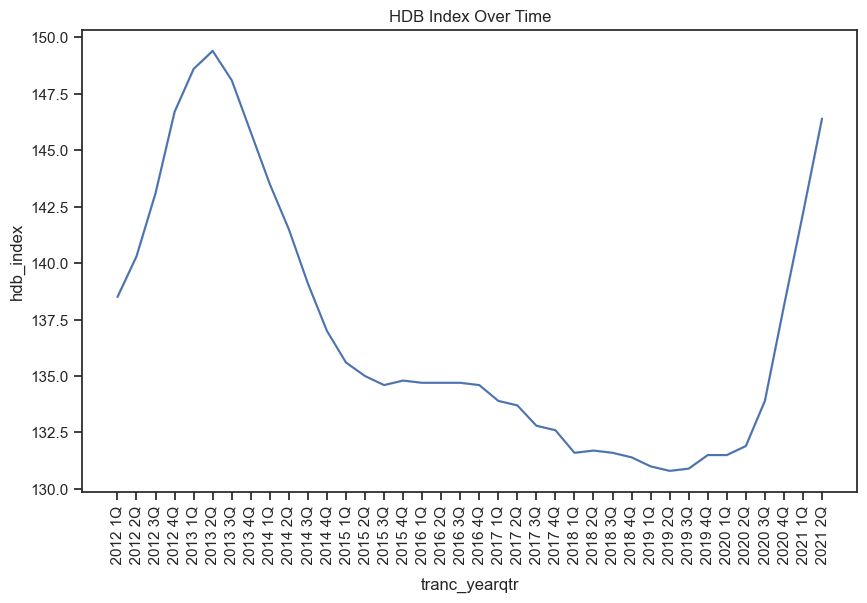

In [48]:
sns.set_theme(style="ticks")

# Define the DataFrame (house_df1)
df = house_df1.copy()

# Sort the DataFrame by 'tranc_yearqtr' in ascending order
df = df.sort_values('tranc_yearqtr')

# Set the desired chart size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df, x="tranc_yearqtr", y="hdb_index", ax=ax)

# Rotate x-axis ticks vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title('HDB Index Over Time')

# Show the plot
plt.show()

* The HDB price index falls after 2013 2Q hit a peak due to cooling measures picks up at 2019 3Q due to the shortage of HDB supplies.


### Distribution of Resale Prices by flat_type (Ridgeline Plot)

C:\Users\Lua Yeow Wen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lua Yeow Wen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lua Yeow Wen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lua Yeow Wen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lua Yeo

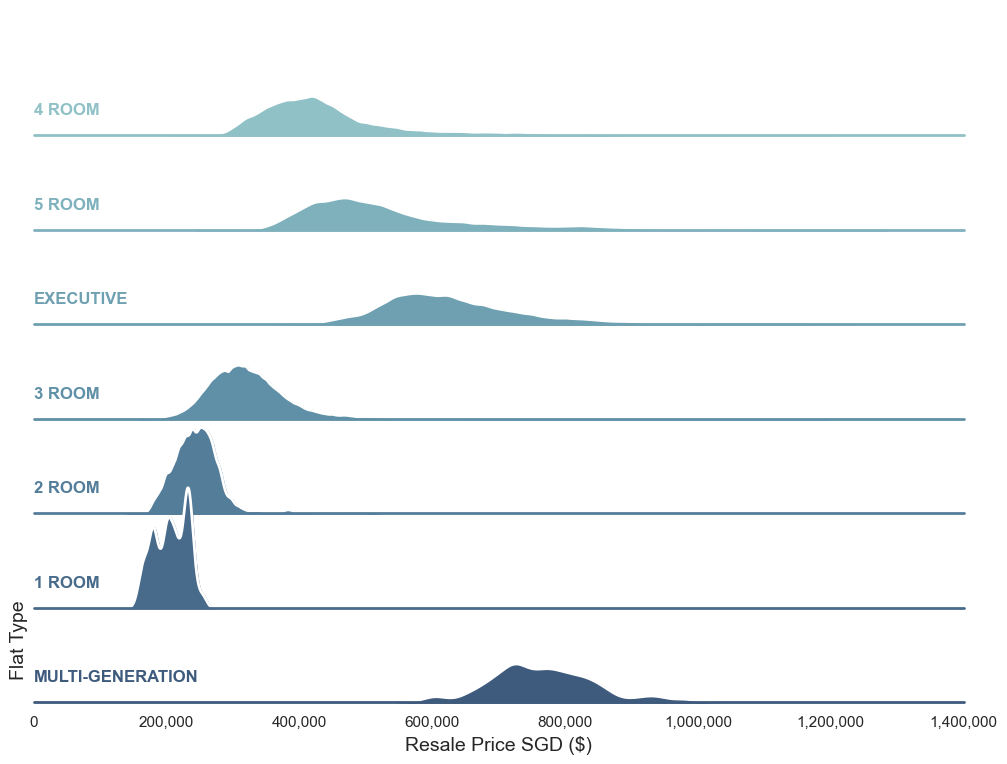

In [49]:
# ridgeline plot for looking at distribution   
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
df = house_df1.copy()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="flat_type", hue="flat_type", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "resale_price",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "resale_price", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "resale_price")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Format x-axis tick labels as actual values
g.set_xticklabels(['{:,.0f}'.format(x) for x in g.axes[0][0].get_xticks()])

# Set the desired chart size
g.fig.set_size_inches(12, 9)  # Set the width and height of the chart

# Set x-axis and y-axis labels
plt.xlabel('Resale Price SGD ($)', fontsize=14)
plt.ylabel('Flat Type', fontsize=14)

# Show the plot
plt.show()

### Mean and Median Resale Price by Flat Type

In [50]:
# mean resale prices by flat type
resale_price_gb_mean = house_df1.groupby('flat_type')['resale_price'].mean()
resale_price_gb_mean = pd.DataFrame(resale_price_gb_mean)
resale_price_gb_mean.columns = ['mean_resale_price']


# median resale prices by flat type
resale_price_gb_med = house_df1.groupby('flat_type')['resale_price'].median()
resale_price_gb_med = pd.DataFrame(resale_price_gb_med)
resale_price_gb_med.columns = ['median_resale_price']


# mode resale prices by flat type
resale_price_gb_mode = house_df1.groupby('flat_type')['resale_price'].count()
resale_price_gb_mode = pd.DataFrame(resale_price_gb_mode)
resale_price_gb_mode.columns = ['mode_resale_price']


# Combine mean and median and mode dataframes
resale_price_combined = pd.concat([resale_price_gb_mean, resale_price_gb_med,resale_price_gb_mode], axis=1)

resale_price_combined

mean_resale_price  median_resale_price  mode_resale_price
flat_type                                                                  
1 ROOM                207015.463415             209000.0                 82
2 ROOM                245630.724156             245000.0               1896
3 ROOM                326837.412180             318000.0              39060
4 ROOM                445014.602849             420000.0              61136
5 ROOM                537147.679577             500000.0              36415
EXECUTIVE             633946.123062             615000.0              11989
MULTI-GENERATION      767992.000000             765500.0                 56

* HDB units with more rooms will have higher resale price.


* 2 Room and 3 Room units are normally distributed.


* 4 Room , 5 Room and Executive units are right skewed that suggest outliers. Their median values are also lower than the mean value which are influenced by the outliers.


* 1 Room and Multi-Generation has low value count. Therefore, does not follow normal distribution.


* To further study after plotting the boxplots.

### Resale Prices by flat_type (Boxplot)

In [51]:
def plot_boxplot(dataframe, column, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.boxplot(data=dataframe, y=column, x=dataframe["resale_price"], orient="h", palette='Paired')
    
    ax.set_title(title, fontsize=14)
    ax.ticklabel_format(style='plain', axis='x')
    
    plt.show()

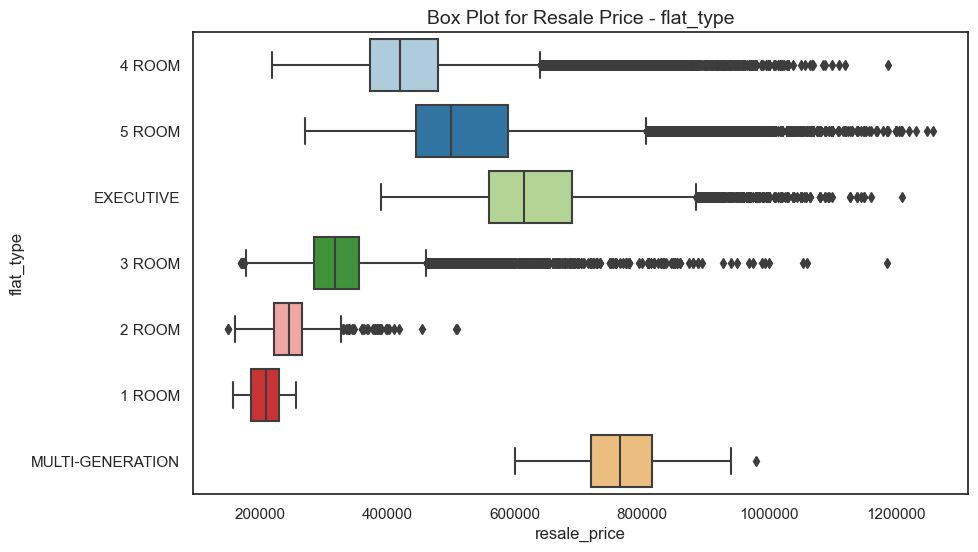

In [52]:
column = 'flat_type'
title = 'Box Plot for Resale Price - flat_type'

plot_boxplot(house_df1, column, title)

* There is a considerable numbers of outliers for 4 room, 5 room, executive , 3 room.
* The spread of the data in the box for 4 room, 5 room, executive , and Multi-generation units also appeared wider than the rest of the flat types.
* There are a number of 3 room and 4 room units that have higher resale price than 5 room units and more.
* These suggest that there are other factors that dictates the resale prices of the flat.
* Although there are outliers observed in the charts, but in the absence of a subject matter experts, these data points will not be dropped or impute to avoid missing out any valuable insights that are not clear to the layman.

### Resale Prices by town (Boxplot)

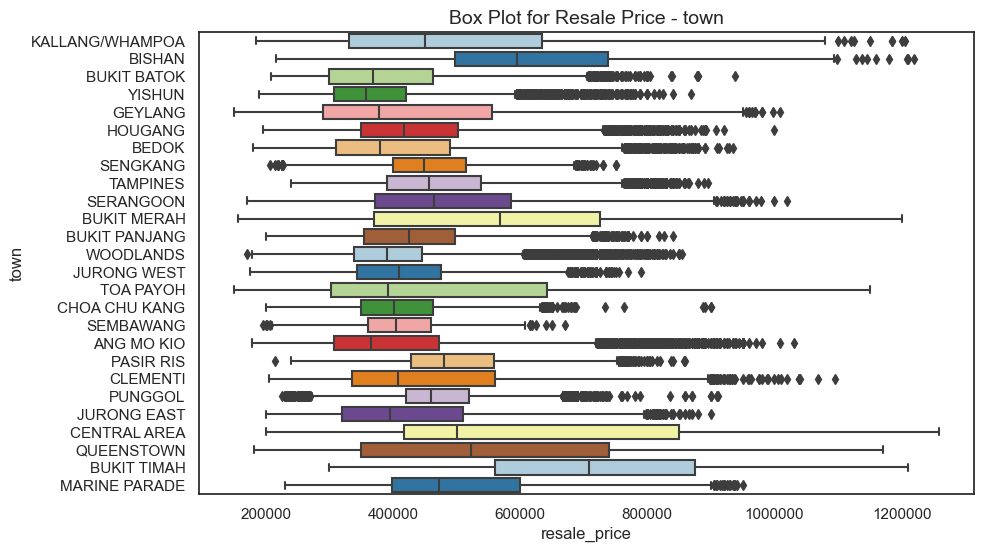

In [53]:
column = 'town'
title = 'Box Plot for Resale Price - town'

plot_boxplot(house_df1, column, title)

* HDB units located at Bukit Timah which is at the central region of Singapore has the highest median value.
* It is also notable that several units located at other locations such as Ang Mo kio and Clementi have higher resale price than Bukit Timah which belongs to the outliers.
* Although there are outliers observed in the charts, but in the absence of a subject matter experts, these data points will not be dropped or impute to avoid missing out any valuable insights that are not clear to the layman.

### Resale Prices by top10_town and  town_central (Boxplot)

In [54]:
def subplot_boxplot2(dataframe, list_of_columns, list_of_titles):
    
    fig, ax = plt.subplots(nrows=1, 
                           ncols=2, 
                           sharex=False , 
                           sharey=True, 
                           figsize = (10,10))
    
    ax = ax.ravel()
    
    
    for i, column in enumerate(list_of_columns): 
        
        sns.boxplot(data=dataframe, 
                    x=column, 
                    y=house_df1["resale_price"], 
                    ax=ax[i], 
                    palette='Paired');
        
        ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].ticklabel_format(style='plain', axis='y')

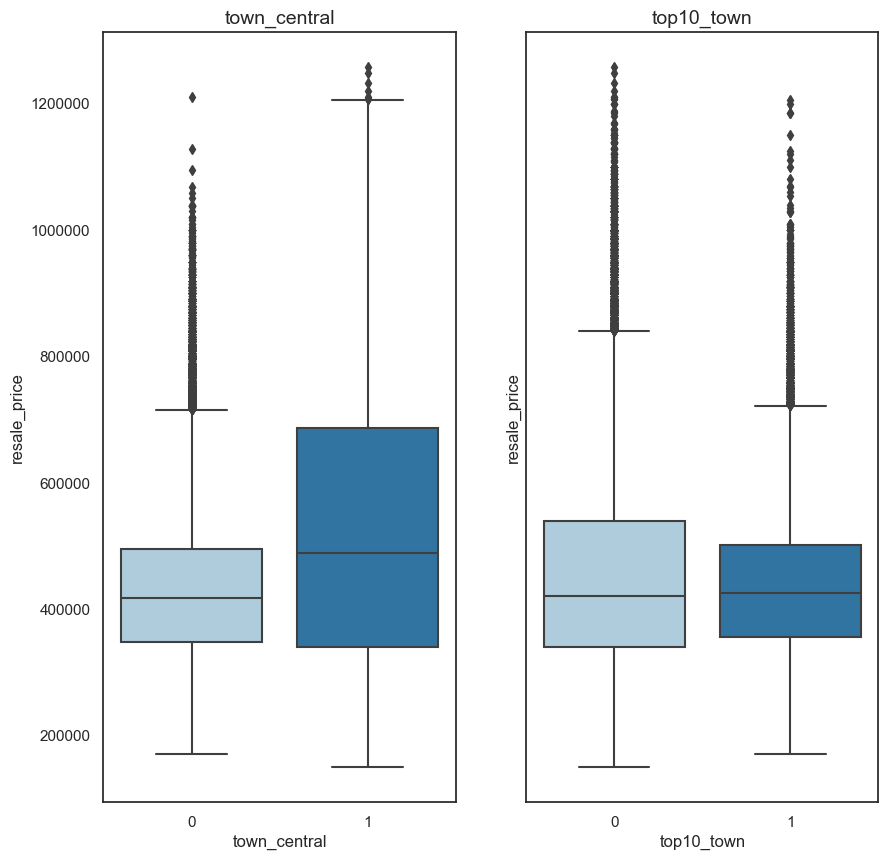

In [55]:
list_col = ['town_central', 
            'top10_town']

titles_bar = [col for col in list_col]

subplot_boxplot2(house_df1, list_col, titles_bar)

town_central = ['BISHAN',
                  'BUKIT MERAH',
                  'GEYLANG',
                  'KALLANG/WHAMPOA',
                  'MARINE PARADE',
                  'QUEENSTOWN',
                  'BUKIT MERAH',
                  'TOA PAYOH',
                  'CENTRAL AREA',
                  ]

top10_town = ['TAMPINES',
                  'WOODLANDS',
                  'SENGKANG',
                  'BEDOK',
                  'ANG MO KIO',
                  'KALLANG/WHAMPOA',
                  'PUNGGOL',
                  'JURONG WEST',
                  'BUKIT MERAH'
                  'YISHUN',
                  ]

#### On the left:

* HDB units located at Central have higher median and maximum resale price than units that are located outside the Central region.

* The spread for the HDB units located at Central region is also wider.

#### On the right: 

* The median resale price between units located at top 10 town and other locations are pretty comparable.
* The spread for the other region is wider than the top 10 town.



Although there are outliers observed in the charts, but in the absence of a subject matter experts, these data points will not be dropped or impute to avoid missing out any valuable insights that are not clear to the layman.

### Resale Prices vs floor_area_sqm by flat_type (Scatterplot)

In [56]:
def plot_scatter_hue(dataframe, column, title, hue='None'):
    plt.figure(figsize=(15, 8))
    sns.scatterplot(data=dataframe, x=column, y='resale_price',hue=hue_type, palette='viridis')
    plt.title(title, fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Resale Price')
    plt.ticklabel_format(style='plain', axis='y')
    sns.regplot(data=dataframe, x=column, y='resale_price', scatter=False, color='orange')
    legend = plt.legend(frameon=True, edgecolor='black', facecolor='white')  # Set legend box with border and white background
    plt.show()

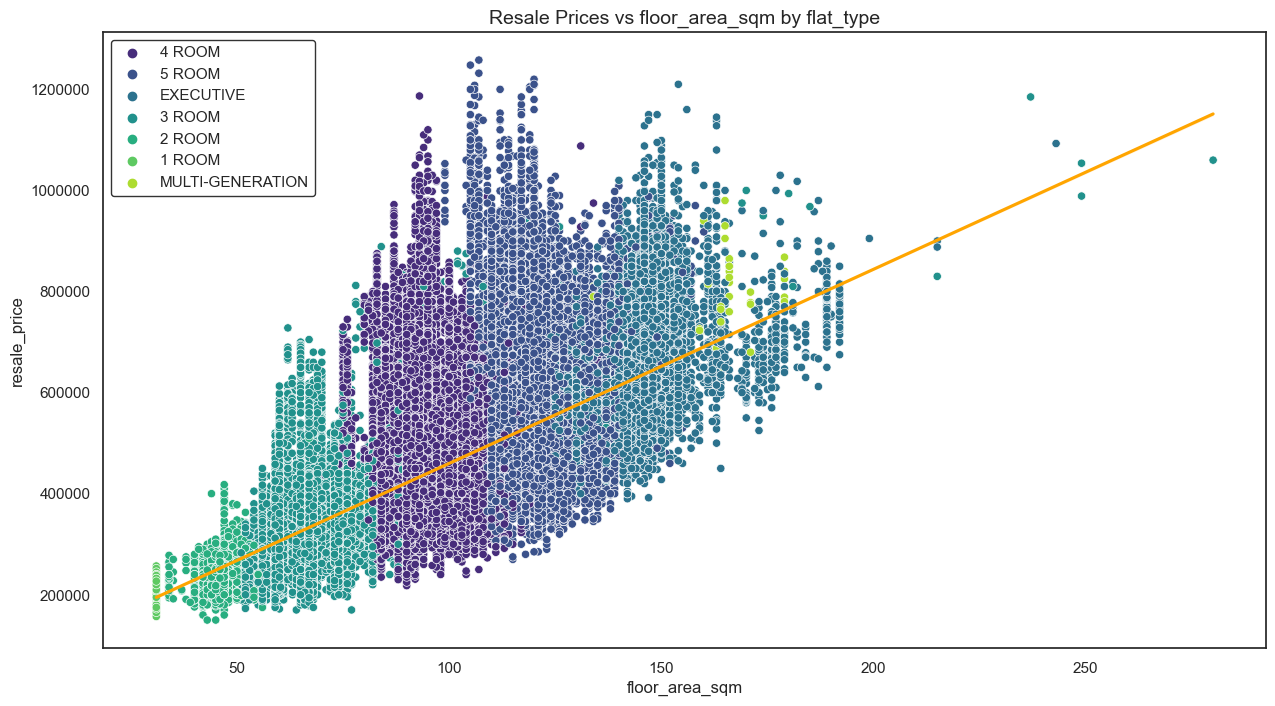

In [57]:
column = 'floor_area_sqm'
title = 'Resale Prices vs floor_area_sqm by flat_type'
hue_type = 'flat_type'

plot_scatter_hue(house_df1, column, title, hue_type)

* There is a positive strong linear relationship between floor_area_sqm and resale_price - Bigger house = Higher resale price.
* It is also observed that most of the HDB units with more rooms have bigger floor area that lead to higher resale price.

### Resale Prices vs floor_area_sqm by flat_model (Scatterplot)

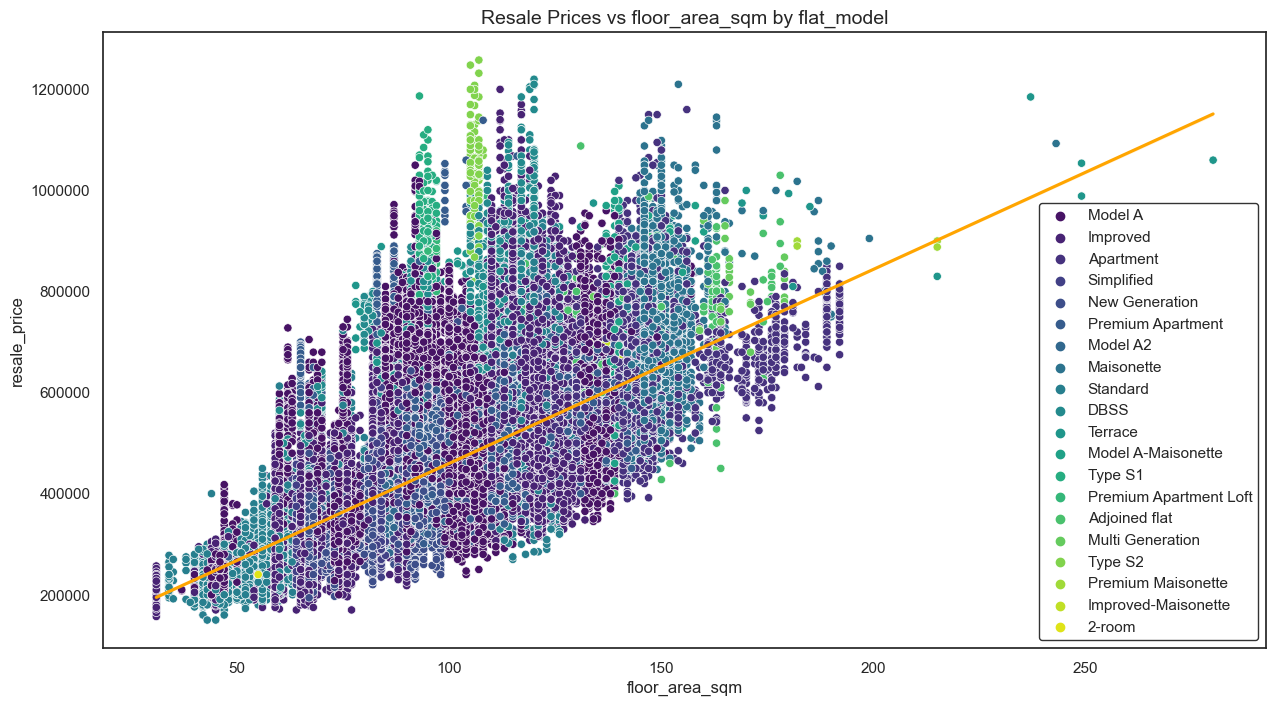

In [58]:
column = 'floor_area_sqm'
title = 'Resale Prices vs floor_area_sqm by flat_model'
hue_type = 'flat_model'

plot_scatter_hue(house_df1, column, title, hue_type)

There is a mixed of resale prices among different flat models.

### Resale Prices vs max_floor_lvl by flat_type (Scatterplot)

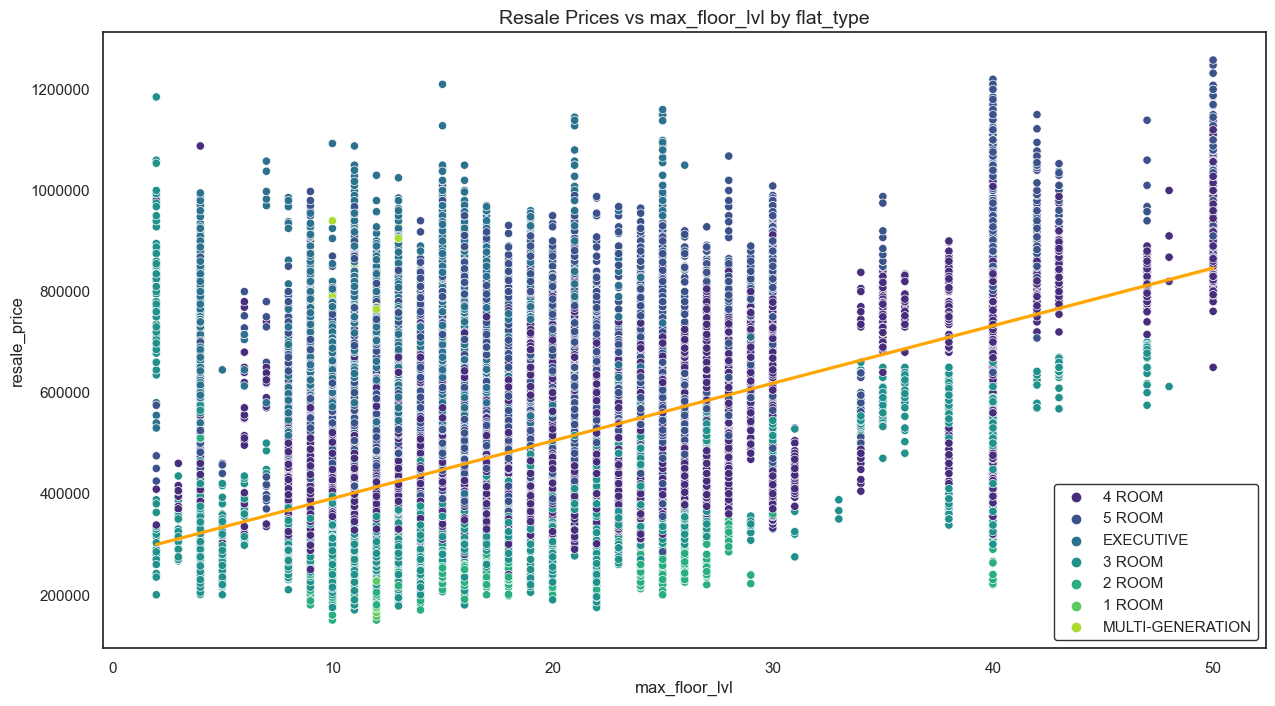

In [59]:
column = 'max_floor_lvl'
title = 'Resale Prices vs max_floor_lvl by flat_type'
hue_type = 'flat_type'

plot_scatter_hue(house_df1, column, title, hue_type)

* There is a positive linear relationship between max_floor_lvl and resale_price - Higher max level of a HDB= Higher resale price.

* However, there this relationship is weak as the data dispersion is wide.This plot suggest a weak correlation between max_floor_lvl and resale_price.

### Resale Prices vs age_tranc (Scatterplot)

In [60]:
def plot_scatter(dataframe, column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dataframe, x=column, y='resale_price')
    plt.title(title, fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Resale Price')
    plt.ticklabel_format(style='plain', axis='y')
    sns.regplot(data=dataframe, x=column, y='resale_price', scatter=False, color='orange')
    plt.show()

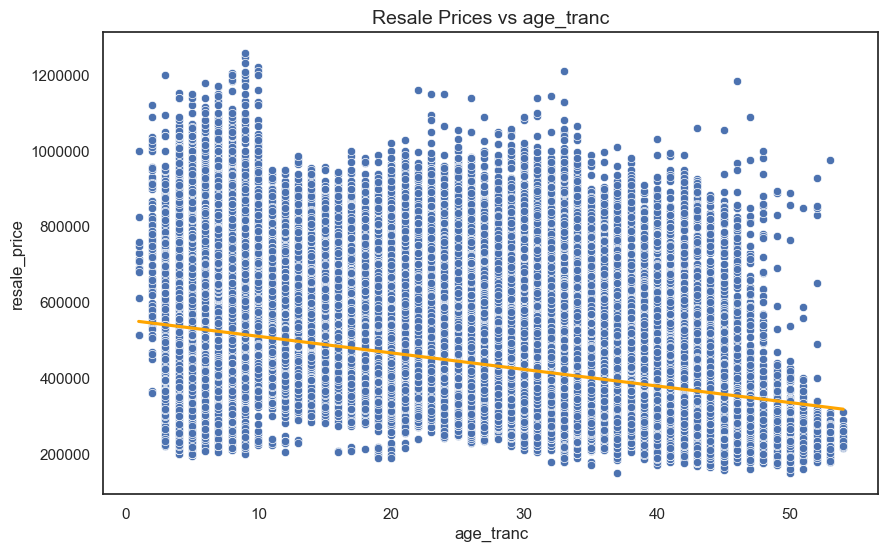

In [61]:
column = 'age_tranc'
title = 'Resale Prices vs age_tranc'

plot_scatter(house_df1, column, title)

* There is a negative weak linear relationship between age_tranc and resale_price - HDB unit that are sold at later years have lower resale price.
* As the data dispersion is wide, this plot suggest a weak correlation between age_tranc and resale_price.

### Resale Prices vs Amenities (Scatterplot)

In [62]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles):
    fig, ax = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=True, figsize=(15, 15))
    ax = ax.ravel()

    for i, column in enumerate(list_of_columns):
        sns.scatterplot(data=dataframe, x=column, y='resale_price', ax=ax[i])
        sns.regplot(data=dataframe, x=column, y='resale_price', scatter=False, ax=ax[i], color='orange')
        ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()

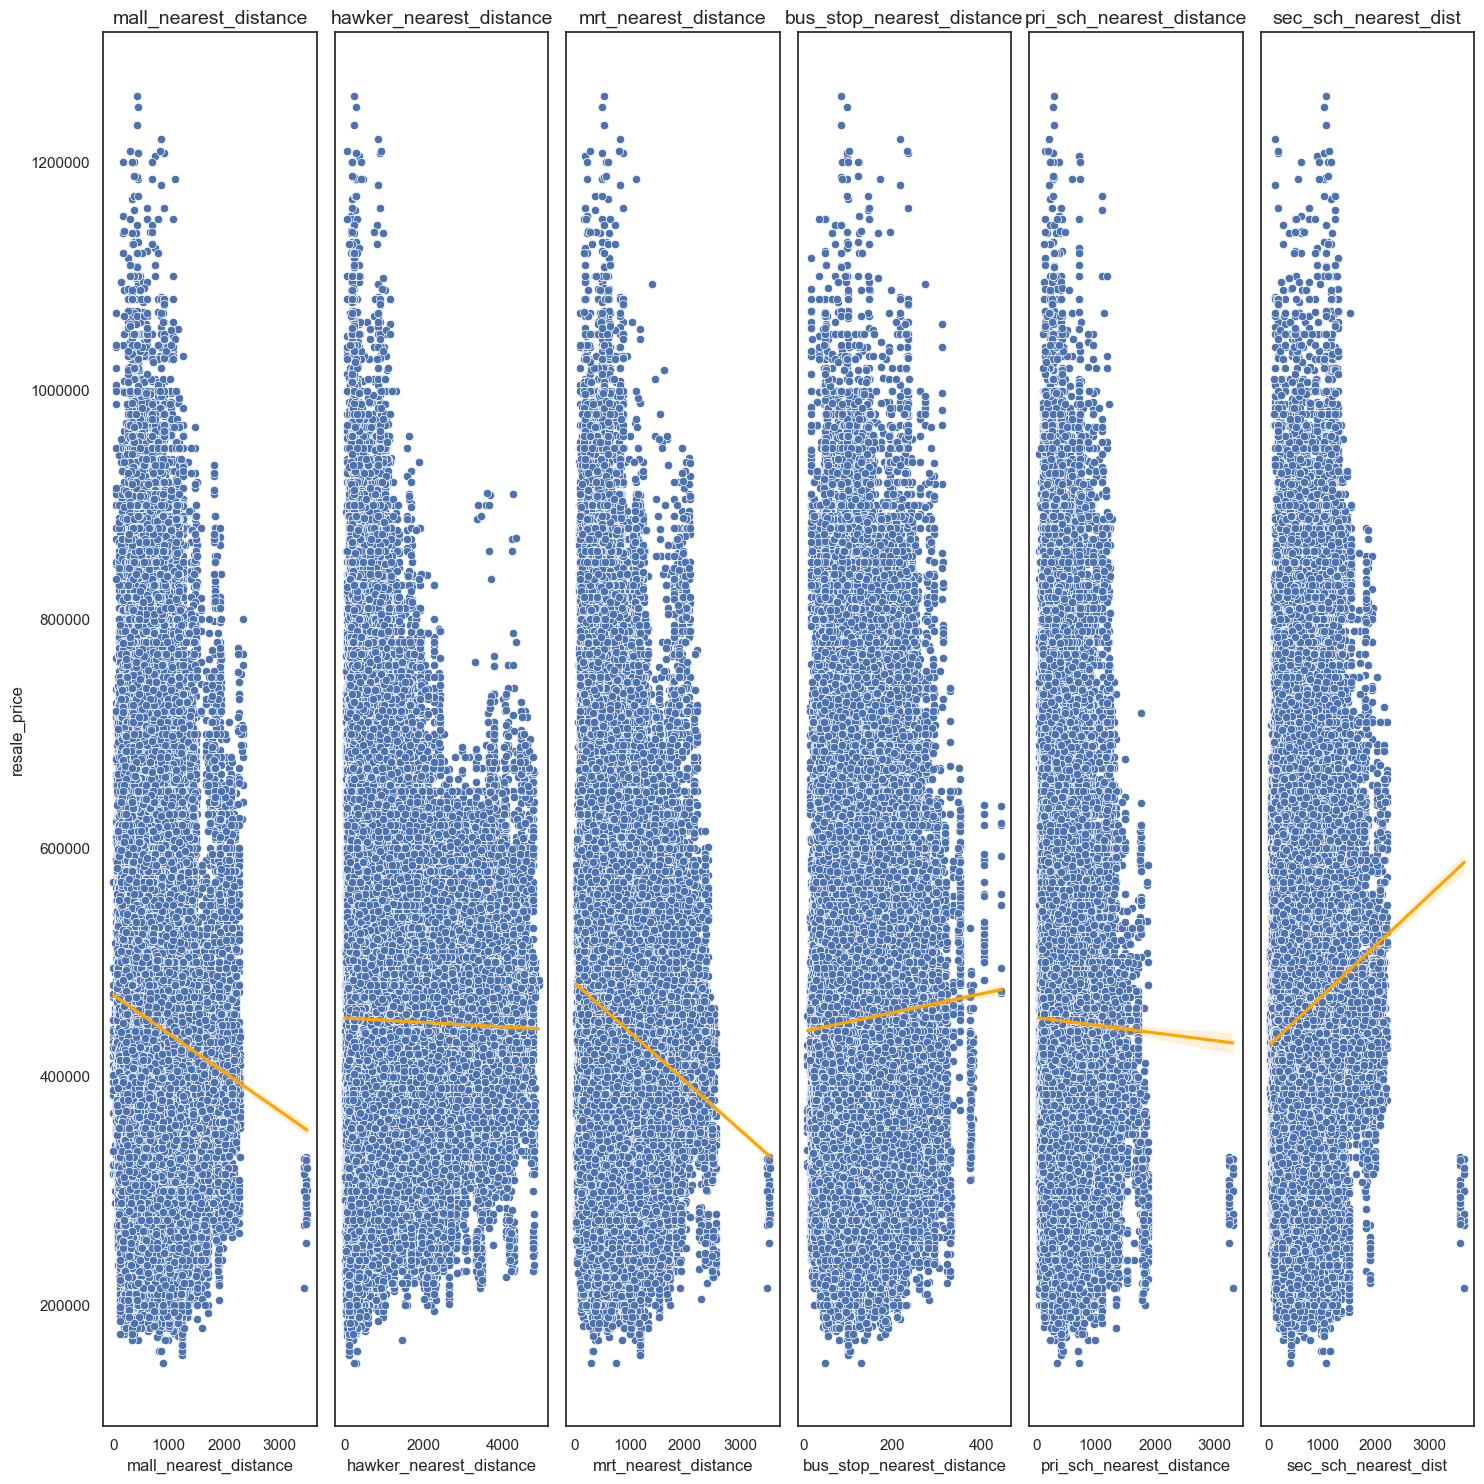

In [63]:
list_col = ['mall_nearest_distance', 'hawker_nearest_distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist']
titles_bar = [col for col in list_col]

subplot_scatter(house_df1, list_col, titles_bar)

* There is a positive relationship between secondary school distance and resale price which is surprising.
* There is a positive relationship between bus stop distance and resale price as well.

### Resale Price by Amenities (Boxplot)

In [64]:
def subplot_boxplot(dataframe, list_of_columns, list_of_titles):
    
    fig, ax = plt.subplots(nrows=1, 
                           ncols=4, 
                           sharex=False , 
                           sharey=True, 
                           figsize = (10,10))
    
    ax = ax.ravel()
    
    
    for i, column in enumerate(list_of_columns): 
        
        sns.boxplot(data=dataframe, 
                    x=column, 
                    y=house_df1["resale_price"], 
                    ax=ax[i], 
                    palette='Paired');
        
        ax[i].set_title(list_of_titles[i], fontsize=14)
        ax[i].ticklabel_format(style='plain', axis='y')

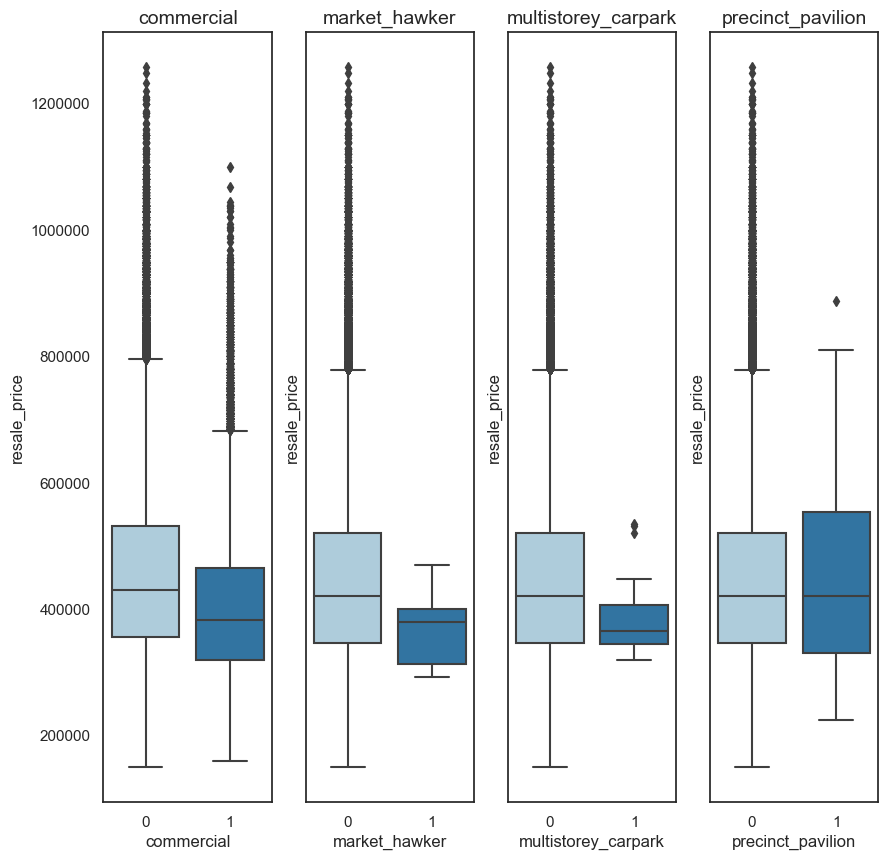

In [65]:
list_col = ['commercial', 
            'market_hawker', 
            'multistorey_carpark', 
            'precinct_pavilion']

titles_bar = [col for col in list_col]

subplot_boxplot(house_df1, list_col, titles_bar)

* It is observed that flat units with amenities have lower median resale price than flat units without amenities which is surprising.
* Although there are outliers observed in the charts, but in the absence of a subject matter experts, these data points will not be dropped or impute to avoid missing out any valuable insights that are not clear to the layman.

### Resales Price by Top Primary and Secondary School (Boxplot)

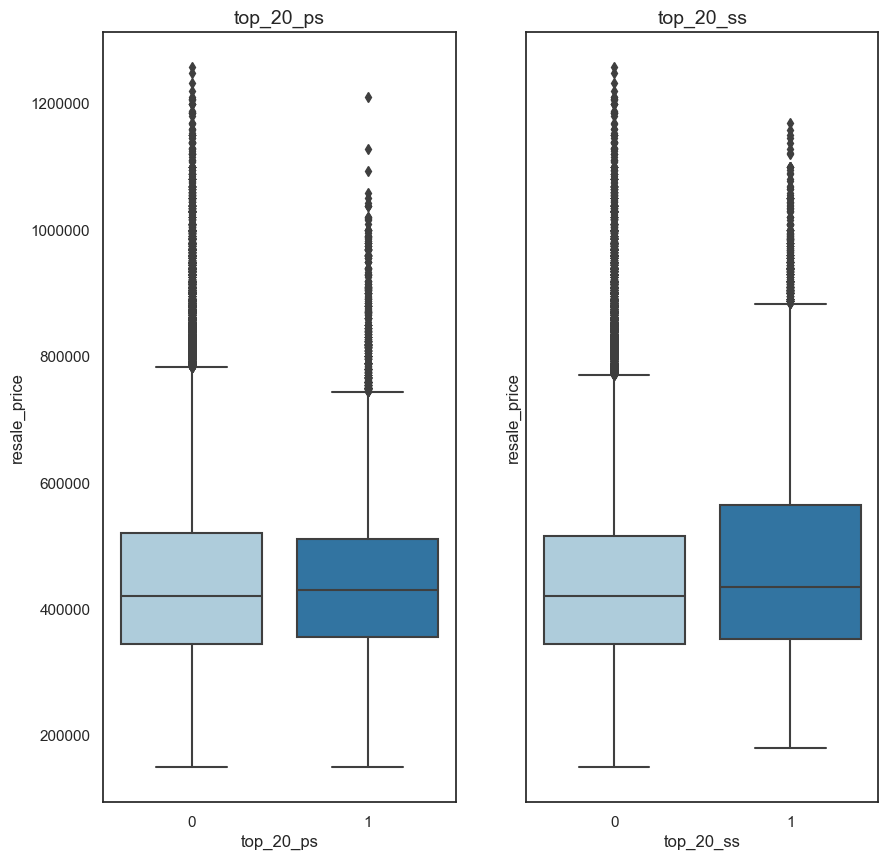

In [66]:
list_col = ['top_20_ps', 
            'top_20_ss']

titles_bar = [col for col in list_col]

subplot_boxplot2(house_df1, list_col, titles_bar)

* The median resale price of the HDB units are pretty near across all primary and secondary schools
* This suggests that the distribution of the resale price is similar for all primary schools.
* Same goes for top_20_ss on the distribution.
* Although there are outliers observed in the charts, but in the absence of a subject matter experts, these data points will not be dropped or impute to avoid missing out any valuable insights that are not clear to the layman.

### Distribution of Resales Price by Top Primary and Secondary School (Histogram)

In [67]:
def plot_distribution_split(dataframe, column, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Filter the dataframe for top_20_ps = 0 and plot the distribution
    ax1 = sns.histplot(data=dataframe[dataframe[column] == 0], x='resale_price', ax=axes[0])
    ax1.set_title('Distribution for ' + column + ' = 0')
    ax1.set_xlabel('Resale Price')
    ax1.set_ylabel('Frequency')
    ax1.ticklabel_format(style='plain', axis='x')
    ax1.ticklabel_format(style='plain', axis='y')
    
    # Add a line representing the mean value of resale_price
    mean_resale_price_0 = dataframe[dataframe[column] == 0]['resale_price'].mean()
    ax1.axvline(x=mean_resale_price_0, color='red', linestyle='--', label='Mean Resale Price: {:.2f}'.format(mean_resale_price_0))
    ax1.legend(facecolor='white', edgecolor='black')  # Set legend background as white and border as black
    
    # Filter the dataframe for top_20_ps = 1 and plot the distribution
    ax2 = sns.histplot(data=dataframe[dataframe[column] == 1], x='resale_price', ax=axes[1])
    ax2.set_title('Distribution for ' + column + ' = 1')
    ax2.set_xlabel('Resale Price')
    ax2.set_ylabel('Frequency')
    ax2.ticklabel_format(style='plain', axis='x')
    ax2.ticklabel_format(style='plain', axis='y')
    
    # Add a line representing the mean value of resale_price
    mean_resale_price_1 = dataframe[dataframe[column] == 1]['resale_price'].mean()
    ax2.axvline(x=mean_resale_price_1, color='red', linestyle='--', label='Mean Resale Price: {:.2f}'.format(mean_resale_price_1))
    ax2.legend(facecolor='white', edgecolor='black')  # Set legend background as white and border as black
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

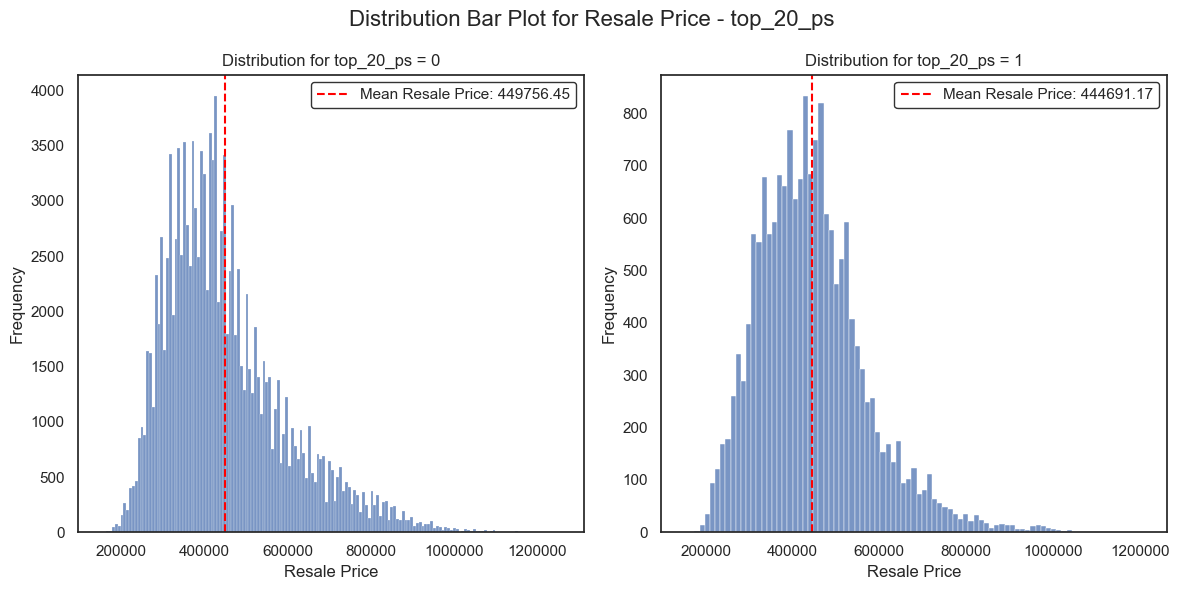

In [68]:
column = 'top_20_ps'
title = 'Distribution Bar Plot for Resale Price - top_20_ps'

plot_distribution_split(house_df1, column, title)

The distribution of the resale price is similar for all primary schools.

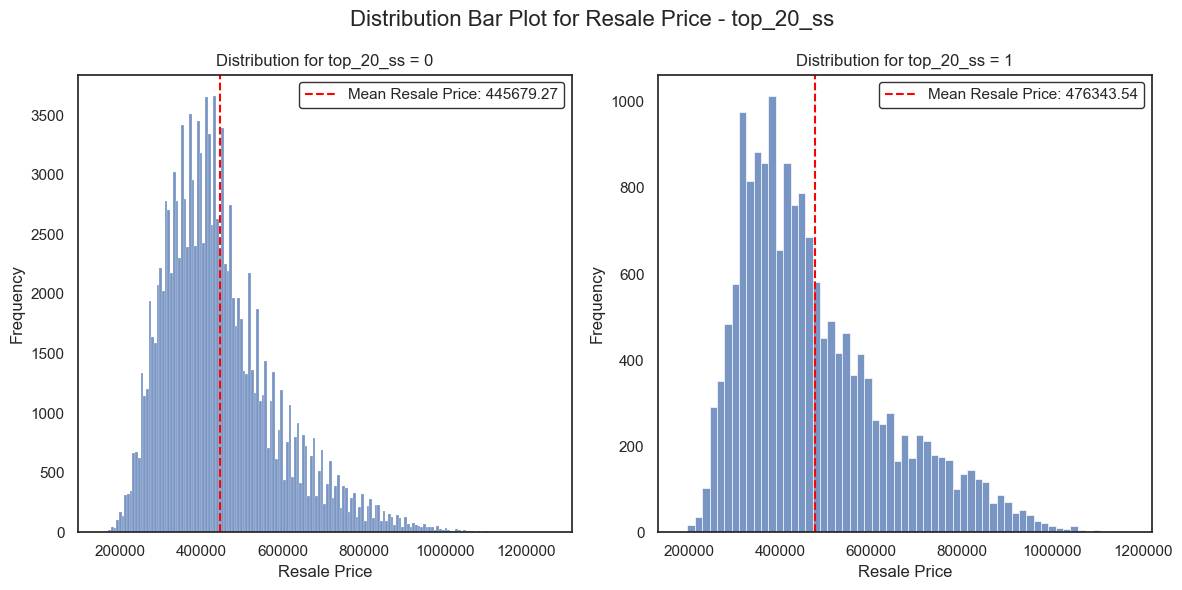

In [69]:
column = 'top_20_ss'
title = 'Distribution Bar Plot for Resale Price - top_20_ss'

plot_distribution_split(house_df1, column, title)

The distribution of the resale price is similar for all secondary schools.

### Drop Irrelevant Features

In [70]:
# Drop irrelevant features for house_df1

house_df1 = house_df1.drop([
                           'block',
                           'street_name',
                           'storey_range',
                           'mid_storey',
                           'full_flat_type',
                           'address',
                           'floor_area_sqft',
                           'year_completed',
                           'residential',
                           '1room_sold',
                           '2room_sold',
                           '3room_sold',
                           '4room_sold',
                           '5room_sold',
                           'exec_sold',
                           'multigen_sold',
                           'studio_apartment_sold',
                           '1room_rental',
                           '2room_rental',
                           '3room_rental',
                           'other_room_rental',
                           'postal',
                           'latitude',
                           'longitude',
                           'mall_within_500m',
                           'mall_within_1km',
                           'mall_within_2km',
                           'hawker_within_500m',
                           'hawker_within_1km',
                           'hawker_within_2km',
                           'mrt_latitude',
                           'mrt_longitude',
                           'bus_stop_name',
                           'bus_stop_latitude',
                           'bus_stop_longitude',
                           'pri_sch_latitude',
                           'pri_sch_longitude',
                           'sec_sch_latitude',
                           'sec_sch_longitude',
                           'planning_area'], axis=1)

In [71]:
# Drop irrelevant features for house_df1_test

house_df1_test = house_df1_test.drop([
                                     'block',
                                     'street_name',
                                     'storey_range',
                                     'mid_storey',
                                     'full_flat_type',
                                     'address',
                                     'floor_area_sqft',
                                     'year_completed',
                                     'residential',
                                     '1room_sold',
                                     '2room_sold',
                                     '3room_sold',
                                     '4room_sold',
                                     '5room_sold',
                                     'exec_sold',
                                     'multigen_sold',
                                     'studio_apartment_sold',
                                     '1room_rental',
                                     '2room_rental',
                                     '3room_rental',
                                     'other_room_rental',
                                     'postal',
                                     'latitude',
                                     'longitude',
                                     'mall_within_500m',
                                     'mall_within_1km',
                                     'mall_within_2km',
                                     'hawker_within_500m',
                                     'hawker_within_1km',
                                     'hawker_within_2km',
                                     'mrt_latitude',
                                     'mrt_longitude',
                                     'bus_stop_name',
                                     'bus_stop_latitude',
                                     'bus_stop_longitude',
                                     'pri_sch_latitude',
                                     'pri_sch_longitude',
                                     'sec_sch_latitude',
                                     'sec_sch_longitude',
                                     'planning_area'], axis=1)

### Multicolinearity for numerical and encoded columns (Heatmap)

In [72]:
column_list=['floor_area_sqm', 'resale_price', 'hdb_age', 'max_floor_lvl',
       'total_dwelling_units', 'mall_nearest_distance',
       'hawker_nearest_distance', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance','bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy',
       'sec_sch_nearest_dist', 'cutoff_point', 'hdb_index', 'age_tranc','top_20_ps','top_20_ss','top10_town','town_central']

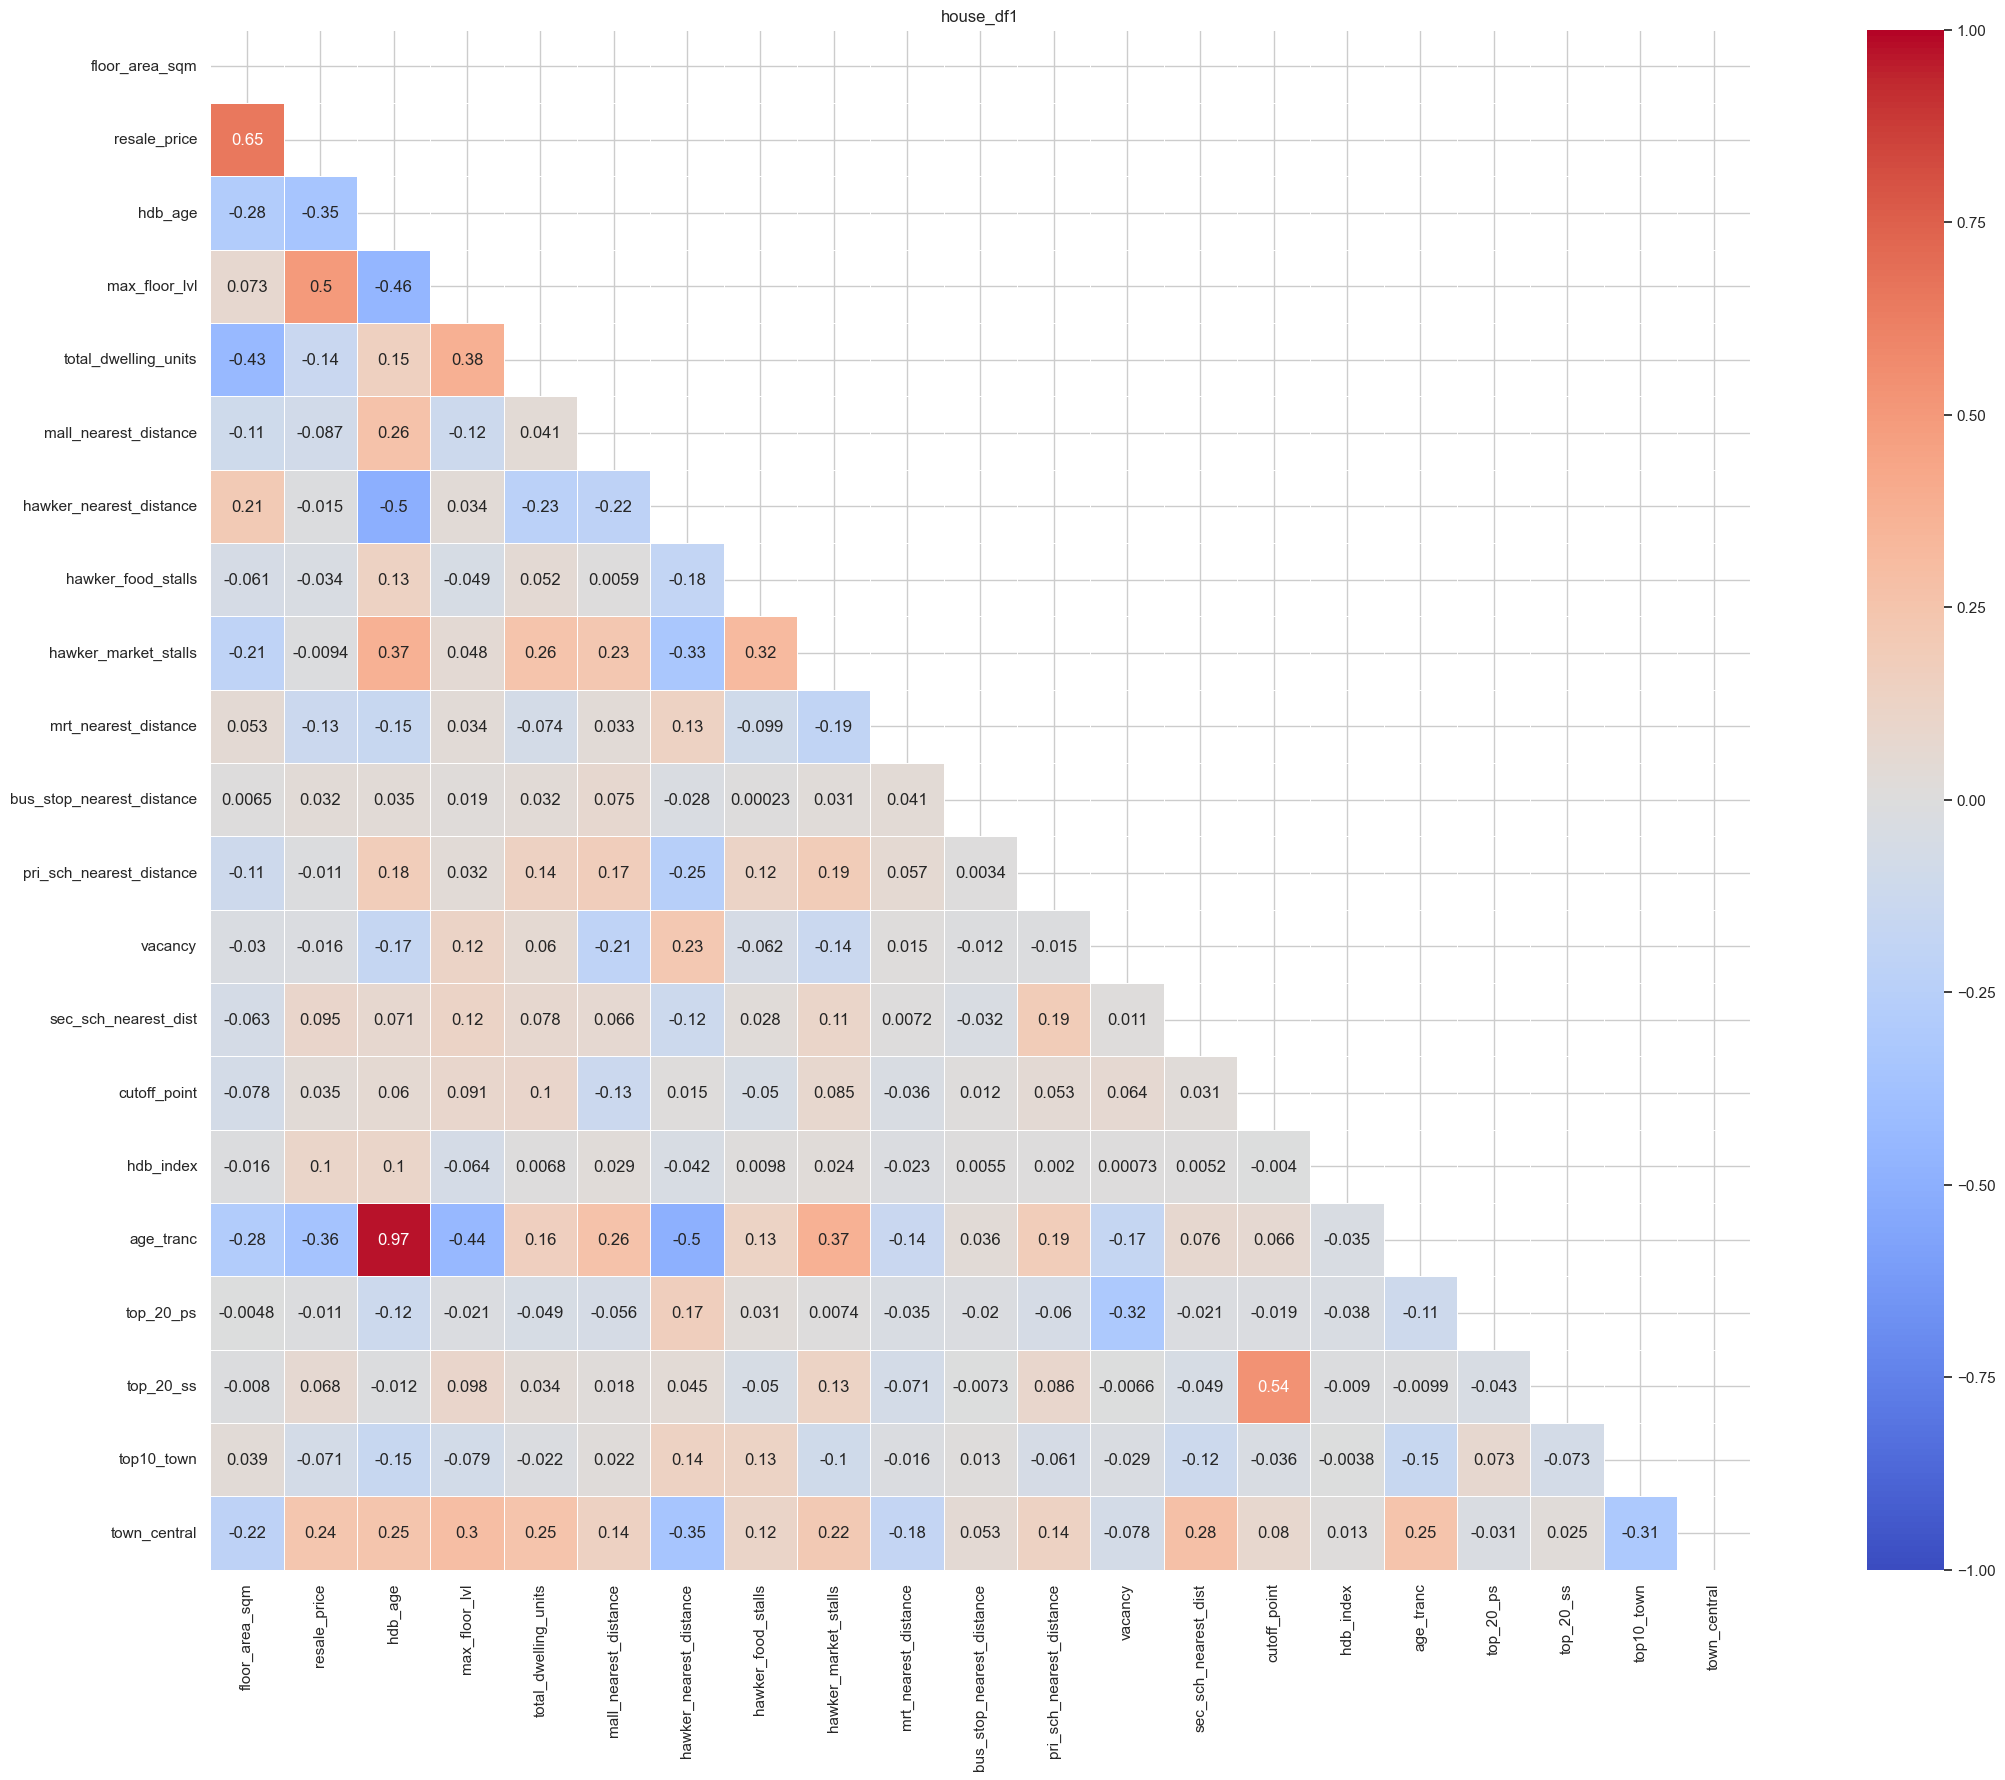

In [73]:
# Code
# Heatmap

plt.figure(figsize = (30,20))

corr = house_df1[column_list].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('whitegrid'):
    sns.heatmap(corr, mask = mask, square = True, annot = True, cmap='coolwarm', vmin = -1, vmax = 1, linewidths = .5)
    
plt.title('house_df1');

### Features with multicollinearity 
hdb_age - age_tranc= 0.97

hdb_age will be dropped to reduce redundancy and overfitting in the ML models.

In [74]:
house_df1.drop([
                'hdb_age',
                #'age_tranc',
               ], 
                axis=1, 
                inplace=True)

In [75]:
house_df1_test.drop([
                'hdb_age',
                #'age_tranc',
               ], 
                axis=1, 
                inplace=True)

In [76]:
#Drop pri_sch_name and sec_sch_name columns

house_df1 = house_df1.drop(['pri_sch_name', 'sec_sch_name'], axis=1)
house_df1_test = house_df1_test.drop(['pri_sch_name', 'sec_sch_name'], axis=1)

In [77]:
#Drop tranc_year and lease_commence_date

house_df1 = house_df1.drop(['tranc_year','lease_commence_date','tranc_yearmonth','tranc_month','tranc_yearqtr','tranc_qtr'], axis=1)
house_df1_test = house_df1_test.drop(['tranc_year','lease_commence_date','tranc_yearmonth','tranc_month','tranc_yearqtr','tranc_qtr'], axis=1)

### OneHotEncoder 'town', 'flat_model','flat_type' on Train CSV

In [78]:
# Columns to encode

#encoder.transform for test CSV
columns_to_encode = ['town', 'flat_model','flat_type','mrt_name']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False , handle_unknown='ignore')
#encoder = OneHotEncoder(sparse=False , handle_unknown='ignore',drop='first')



# Perform one-hot encoding for each column
encoded_features = encoder.fit_transform(house_df1[columns_to_encode])

# Create new column names for encoded features
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Concatenate the encoded columns with the original DataFrame
house_df1 = pd.concat([house_df1, encoded_df], axis=1)

# Drop the original columns
house_df1.drop(columns_to_encode, axis=1, inplace=True)

C:\Users\Lua Yeow Wen\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### OneHotEncoder 'town', 'flat_model','flat_type' for Test CSV 

In [79]:
# OneHotEncoder 'town', 'flat_model','flat_type'
# encoder.transform for test CSV


encoded_features_test = encoder.transform(house_df1_test[columns_to_encode])


encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoded_columns)


house_df1_test = pd.concat([house_df1_test, encoded_df_test], axis=1)


# Drop the original columns from the test dataset
house_df1_test.drop(columns_to_encode, axis=1, inplace=True)

In [80]:
#Check rows and columns
print(f"Shape for train dataset; {house_df1.shape}")
print(f"Shape for test dataset; {house_df1_test.shape}")

Shape for train dataset; (150634, 179)
Shape for test dataset; (16737, 178)


### Save Data as CSV before Modelling

In [81]:
#Train data
house_df1.to_csv('datasets/house_df1.csv', index=False)

In [82]:
#Test data
house_df1_test.to_csv('datasets/house_df1_test.csv', index=False)

### Refer to 02_modeling